## Objective of the HR Analytics: Job Data Dataset

###### The objective of the HR Analytics dataset is to analyze factors that influence employee hiring decisions and outcomes. This analysis aims to uncover patterns and insights related to employee characteristics, job features, and their correlation with hiring success or target outcomes (e.g., whether the candidate was hired or not). By identifying trends, the organization can optimize recruitment strategies, improve talent acquisition processes, and enhance employee retention efforts.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('aug_train.csv')

In [3]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


### Understanding Data

In [4]:
df.shape

(19158, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [6]:
df.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [7]:
df.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                    float64
dtype: object

### Missing Values

In [8]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [9]:
((df.isnull().sum())/len(df))*100

enrollee_id                0.000000
city                       0.000000
city_development_index     0.000000
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
last_new_job               2.207955
training_hours             0.000000
target                     0.000000
dtype: float64

#### Gender

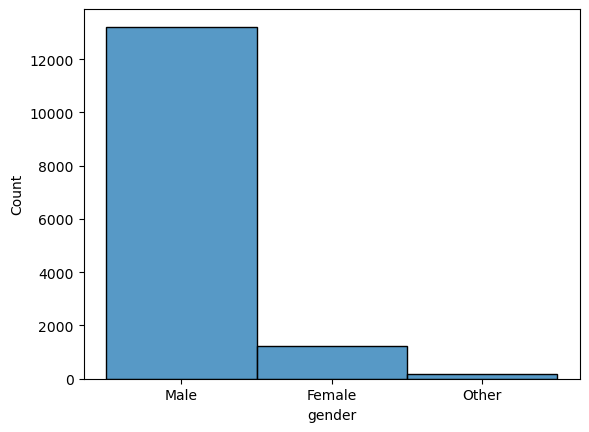

In [10]:
sns.histplot(data=df,x='gender')
plt.show()


In [11]:
gender_counts = df['gender'].value_counts()

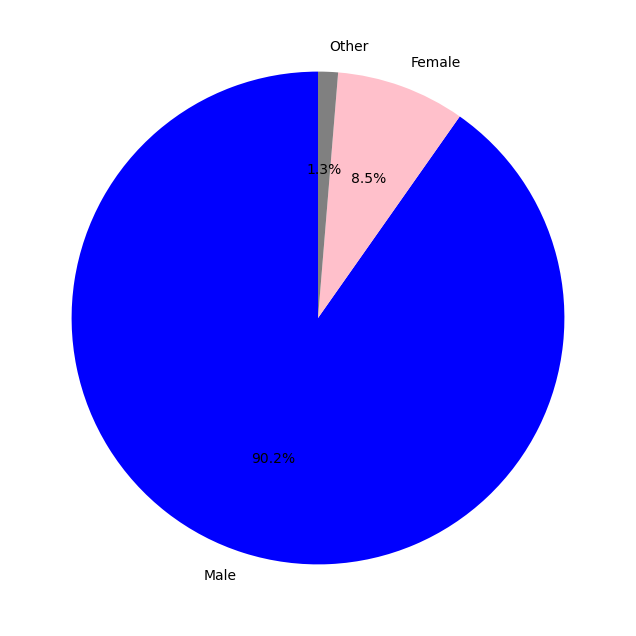

In [12]:
label = gender_counts.index.tolist()
size = gender_counts.values

color = ['blue','pink','grey']
plt.figure(figsize=(10,8))
plt.pie(size, labels=label, autopct='%1.1f%%', colors=color, startangle=90)
plt.show()

- Filling NaN randomly with probabilities

In [13]:
missing_count = df['gender'].isnull().sum()

# Only proceed if there are missing values
if missing_count > 0:
    # Define probabilities
    probabilities = [0.90, 0.085, 0.015]

    # Generate random values
    random_values = np.random.choice(["Male", "Female", "Other"], size=missing_count, p=probabilities)

    # Fill NaN values
    df.loc[df['gender'].isnull(), 'gender'] = random_values

# Verify if NaN values are gone
print(df['gender'].isnull().sum())

0


#### Enrolled universities

In [14]:
df['enrolled_university'].value_counts()

no_enrollment       13817
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64

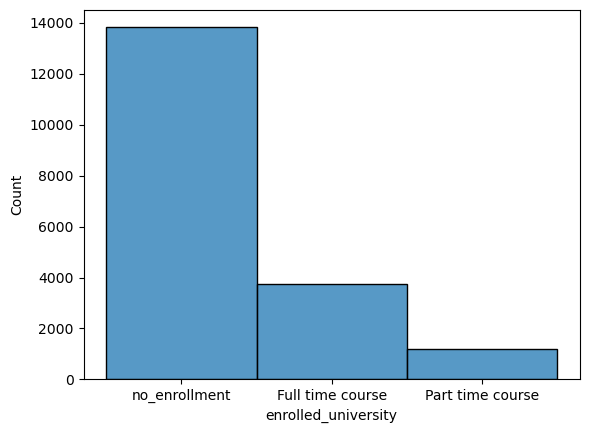

In [15]:
sns.histplot(df['enrolled_university'])
plt.show()

In [16]:
((df['enrolled_university'].value_counts())/len(df))*100

no_enrollment       72.121307
Full time course    19.610607
Part time course     6.253262
Name: enrolled_university, dtype: float64

- Mode 

In [17]:
df['enrolled_university'].fillna(df['enrolled_university'].mode()[0],inplace=True)

In [18]:
df['education_level'].value_counts()

Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64

In [19]:
((df['education_level'].value_counts())/len(df))*100

Graduate          60.538678
Masters           22.763336
High School       10.528239
Phd                2.160977
Primary School     1.607683
Name: education_level, dtype: float64

In [20]:
df['education_level'].fillna(df['education_level'].mode()[0],inplace = True)

In [21]:
df['major_discipline'].value_counts()

STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64

In [22]:
((df['major_discipline'].value_counts())/len(df))*100

STEM               75.644639
Humanities          3.492014
Other               1.988725
Business Degree     1.706859
Arts                1.320597
No Major            1.164005
Name: major_discipline, dtype: float64

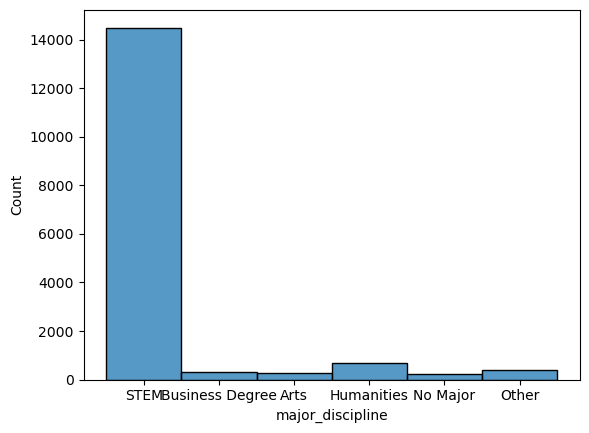

<Figure size 2000x1500 with 0 Axes>

In [23]:
sns.histplot(df['major_discipline'])
plt.figure(figsize=(20,15))
plt.show()

##### Fillng with random choice by normalizing probabilities

In [24]:
categories = ["STEM", "Humanities", "Other", "Business Degree", "Arts", "No Major"]
probabilities = [0.8867, 0.0409, 0.0233, 0.0200, 0.0155, 0.0136]  # Sum must be 1

# Count missing values
missing_count = df['major_discipline'].isnull().sum()

# Generate random choices for missing values
random_values = np.random.choice(categories, size=missing_count, p=probabilities)

# Fill missing values in the dataframe
df.loc[df['major_discipline'].isnull(), 'major_discipline'] = random_values

# Print results
print(df['major_discipline'].isnull().sum())

0


In [25]:
df['experience'].value_counts()

>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: experience, dtype: int64

<AxesSubplot:xlabel='experience', ylabel='Count'>

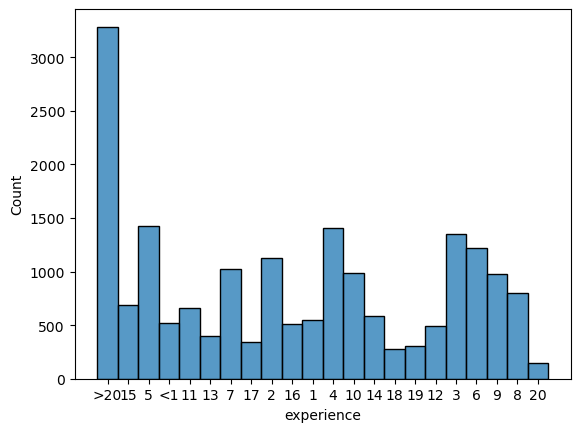

In [26]:
sns.histplot(df['experience'])

In [27]:
df['experience'].fillna(0, inplace = True)

In [28]:
df['company_size'].value_counts()

50-99        3083
100-500      2571
10000+       2019
10/49        1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: company_size, dtype: int64

<AxesSubplot:xlabel='company_size', ylabel='Count'>

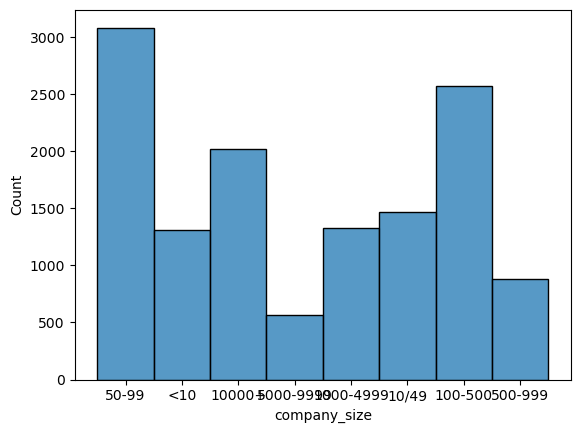

In [29]:
sns.histplot(df['company_size'])

In [30]:
size_distribution = df['company_size'].value_counts(normalize=True)

# Fill NaN values randomly based on the existing distribution
df.loc[df['company_size'].isnull(), 'company_size'] = np.random.choice(
    size_distribution.index,  # Unique categories
    size=df['company_size'].isnull().sum(),  # Number of NaNs to fill
    p=size_distribution.values,  # Probabilities based on existing distribution
    replace=True  # Allow repeated selections
)

# Print updated dataframe
print(df['company_size'].isnull().sum())

0


In [31]:
df['company_type'].value_counts()

Pvt Ltd                9817
Funded Startup         1001
Public Sector           955
Early Stage Startup     603
NGO                     521
Other                   121
Name: company_type, dtype: int64

<AxesSubplot:xlabel='company_type', ylabel='Count'>

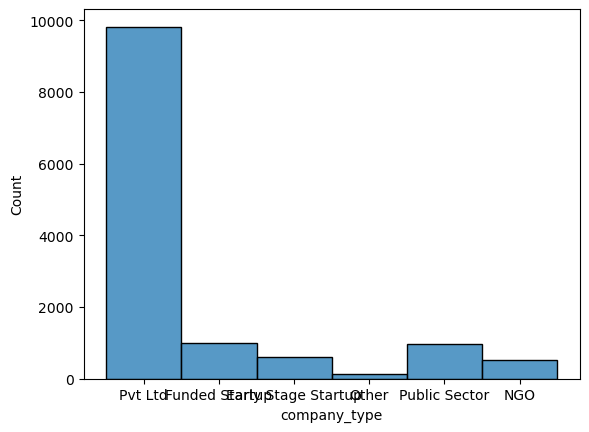

In [32]:
sns.histplot(df['company_type'])

In [33]:
value_counts = df['company_type'].value_counts(normalize=True)  # Get proportions
categories = value_counts.index.to_list()  # Unique categories
probabilities = value_counts.values  # Probabilities (sum to 1)

# Debugging: Check categories and probabilities
print("Categories:", categories)
print("Probabilities:", probabilities)
print("Sum of probabilities:", sum(probabilities))  # Must be 1.0

# Step 2: Count missing values
missing_count = df['company_type'].isnull().sum()
print("Missing values before filling:", missing_count)

# Step 3: Fill missing values only if there are NaNs
if missing_count > 0 and len(categories) == len(probabilities):
    random_values = np.random.choice(categories, size=missing_count, p=probabilities)
    df.loc[df['company_type'].isnull(), 'company_type'] = random_values

# Step 4: Final check
print("Missing values after filling:", df['company_type'].isnull().sum())  

Categories: ['Pvt Ltd', 'Funded Startup', 'Public Sector', 'Early Stage Startup', 'NGO', 'Other']
Probabilities: [0.75410969 0.07689353 0.07335996 0.04632048 0.04002151 0.00929482]
Sum of probabilities: 1.0
Missing values before filling: 6140
Missing values after filling: 0


In [34]:
df['last_new_job'].value_counts()

1        8040
>4       3290
2        2900
never    2452
4        1029
3        1024
Name: last_new_job, dtype: int64

<AxesSubplot:xlabel='last_new_job', ylabel='Count'>

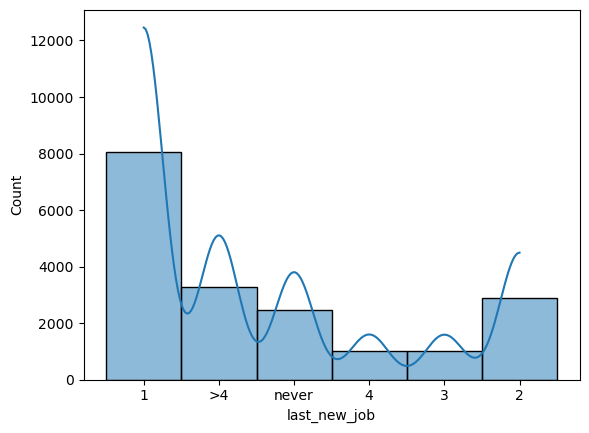

In [35]:
sns.histplot(df['last_new_job'],kde=True)

In [36]:
df['last_new_job'].fillna('Unknown', inplace=True)

#### Final check

In [37]:
df.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

### Checking Duplicates

In [38]:
df.duplicated().sum()

0

- No Duplicates

### Outliers

In [39]:
df.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                    float64
dtype: object

C:\Users\PMLS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='enrollee_id'>

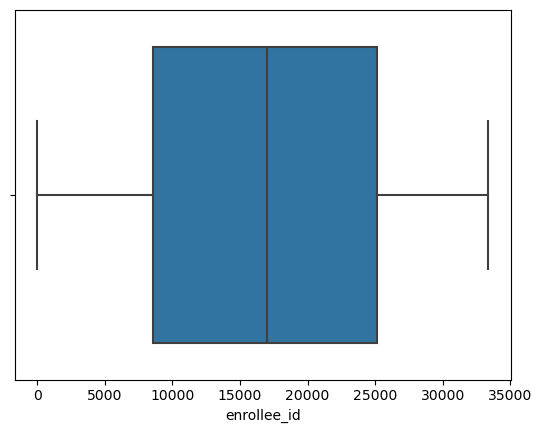

In [40]:
sns.boxplot(df['enrollee_id'])

- No outlier in enrollee_id

C:\Users\PMLS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='city_development_index'>

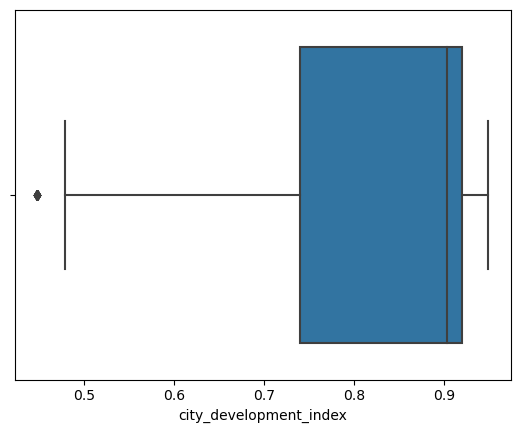

In [41]:
sns.boxplot(df['city_development_index'])

<AxesSubplot:xlabel='city_development_index', ylabel='Count'>

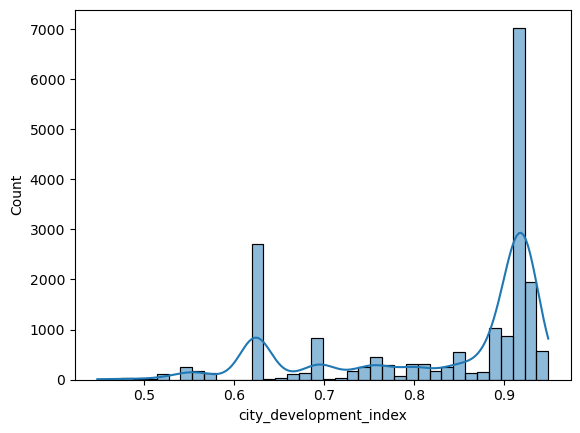

In [42]:
sns.histplot(df['city_development_index'],kde = True)

In [43]:
df['city_development_index'].max(), df['city_development_index'].min(), df['city_development_index'].mean()

(0.949, 0.4479999999999999, 0.8288480008351684)

In [44]:
Q1 = df['city_development_index'].quantile(0.25)
Q3 = df['city_development_index'].quantile(0.75)
IQR = Q3-Q1

lower_bound = Q1 - IQR*1.5
upper_bound = Q3 + IQR*1.5

outliers = df[(df['city_development_index']>upper_bound)|(df['city_development_index']<lower_bound)]
print(len(outliers))

17


In [45]:
outliers

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
1523,8238,city_33,0.448,Male,Has relevent experience,Part time course,Graduate,STEM,10,50-99,NGO,>4,48,1.0
4744,30985,city_33,0.448,Male,No relevent experience,Full time course,Graduate,STEM,2,10000+,Pvt Ltd,never,43,1.0
5010,27970,city_33,0.448,Male,No relevent experience,no_enrollment,Graduate,STEM,1,<10,Pvt Ltd,never,73,1.0
5265,31194,city_33,0.448,Male,No relevent experience,no_enrollment,High School,STEM,5,50-99,Pvt Ltd,never,86,1.0
5567,598,city_33,0.448,Male,Has relevent experience,Part time course,Masters,STEM,6,100-500,Funded Startup,1,18,1.0
6127,18564,city_33,0.448,Male,No relevent experience,Full time course,Graduate,STEM,4,50-99,Public Sector,4,32,1.0
7724,31179,city_33,0.448,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,28,0.0
7864,26838,city_33,0.448,Male,Has relevent experience,no_enrollment,Graduate,STEM,8,50-99,Pvt Ltd,>4,74,0.0
9134,4858,city_33,0.448,Male,No relevent experience,Part time course,Masters,Other,2,<10,NGO,1,23,1.0
10401,19463,city_33,0.448,Male,No relevent experience,no_enrollment,Graduate,STEM,5,10000+,Pvt Ltd,2,36,0.0


- keeping as it is because a city can genuinely has a low development index

C:\Users\PMLS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='training_hours'>

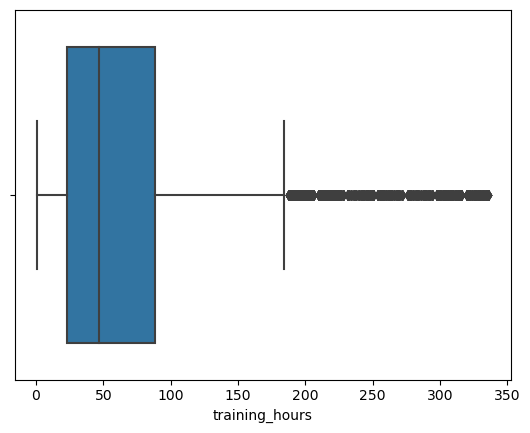

In [46]:
sns.boxplot(df['training_hours'])

<AxesSubplot:xlabel='training_hours', ylabel='Count'>

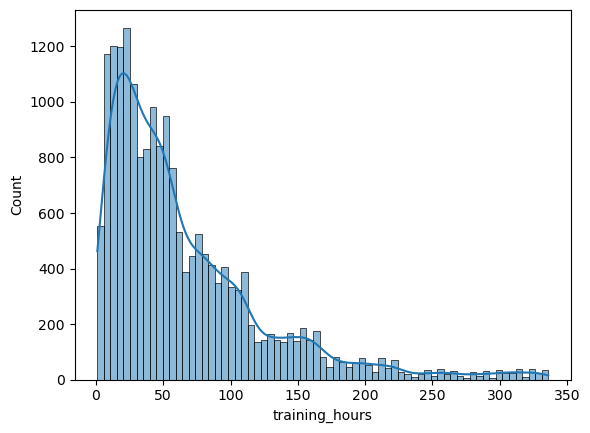

In [47]:
sns.histplot(df['training_hours'],kde=True)

In [48]:
Q1 = df['training_hours'].quantile(0.25)
Q3 = df['training_hours'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - IQR*1.5
upper_limit = Q3 + IQR*1.5

outliers = df[(df['training_hours']>upper_limit)|(df['training_hours']<lower_limit)]
print(len(outliers))
print("Outlier Values:\n", outliers['training_hours'].values)

984
Outlier Values:
 [206 228 332 210 260 290 326 198 246 202 218 190 210 262 240 320 206 204
 302 198 214 288 198 306 322 206 220 206 314 226 280 234 204 256 218 198
 206 326 326 206 290 292 188 192 326 216 314 196 256 276 188 316 242 196
 218 202 304 284 278 284 332 310 222 212 250 246 258 330 222 216 220 326
 240 222 194 314 202 210 312 200 196 198 310 262 190 222 328 300 226 198
 192 212 218 190 232 280 336 192 308 228 298 214 242 196 316 292 316 224
 210 254 258 232 212 332 248 320 260 320 236 190 222 226 276 280 204 210
 316 206 188 328 190 254 246 222 246 278 264 204 212 308 212 328 262 206
 312 202 220 198 248 292 216 206 308 196 302 298 242 210 332 314 334 188
 324 210 334 332 258 190 192 198 224 206 264 202 220 224 300 204 238 314
 218 328 224 192 256 246 266 282 314 204 192 298 316 290 304 192 276 288
 300 200 192 268 256 202 276 192 320 262 206 326 244 282 212 336 210 300
 216 266 188 206 196 248 336 312 222 224 258 216 290 214 198 272 218 188
 194 190 288 300 336 194 264 2

- Keeping them

C:\Users\PMLS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target'>

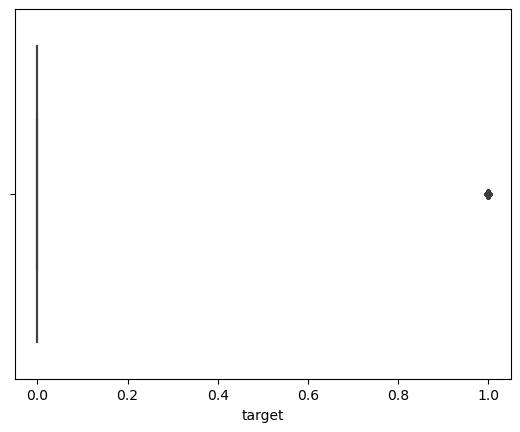

In [49]:
sns.boxplot(df['target'])

<AxesSubplot:xlabel='target', ylabel='Count'>

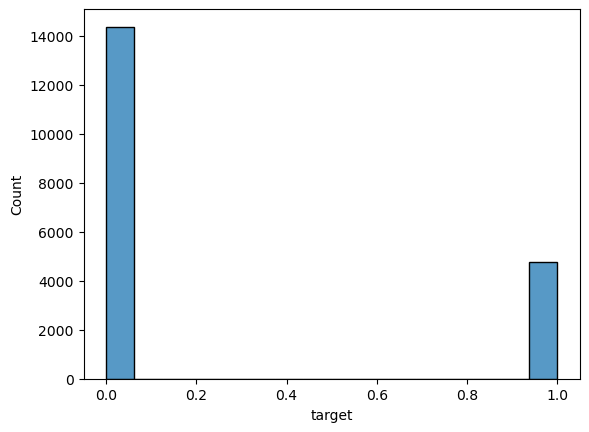

In [50]:
sns.histplot(df['target'])

- No outliers in target

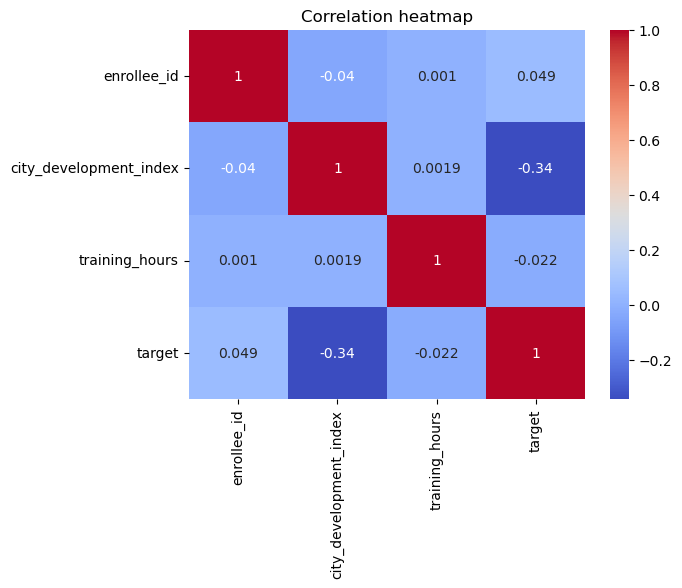

In [51]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation heatmap')
plt.show()

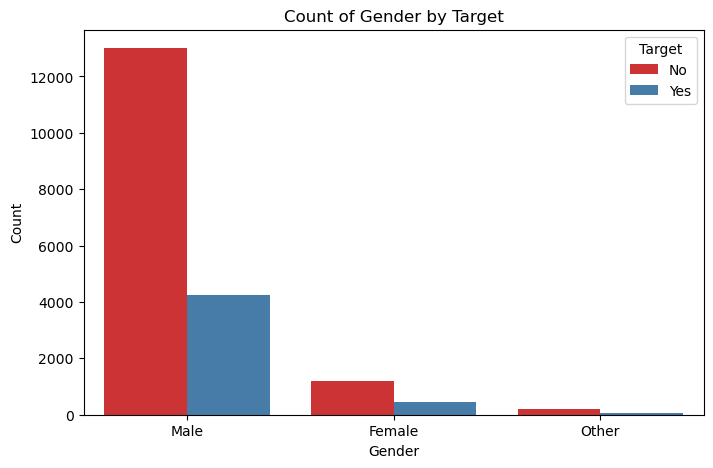

In [52]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='gender', hue='target', palette='Set1')

# Adding title and labels
plt.title('Count of Gender by Target')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Target', loc='upper right', labels=['No', 'Yes'])
plt.show()

In [53]:
df['relevent_experience'].value_counts()

Has relevent experience    13792
No relevent experience      5366
Name: relevent_experience, dtype: int64

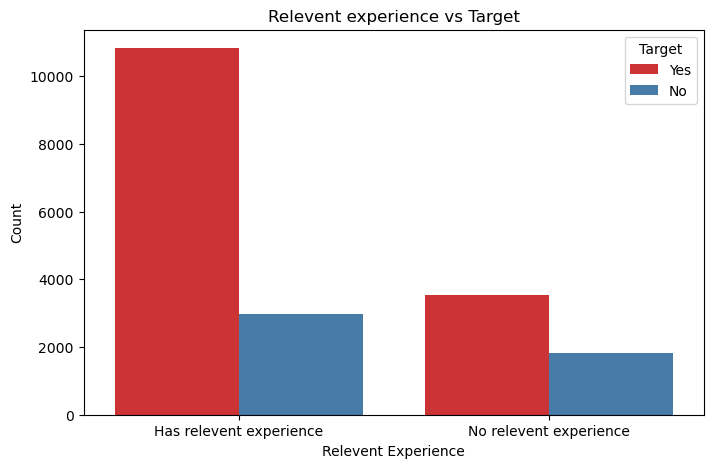

In [54]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='relevent_experience', hue='target', palette='Set1')
plt.title('Relevent experience vs Target')
plt.xlabel('Relevent Experience')
plt.ylabel('Count')
plt.legend(title='Target', loc='upper right', labels=['Yes','No'])
plt.show()

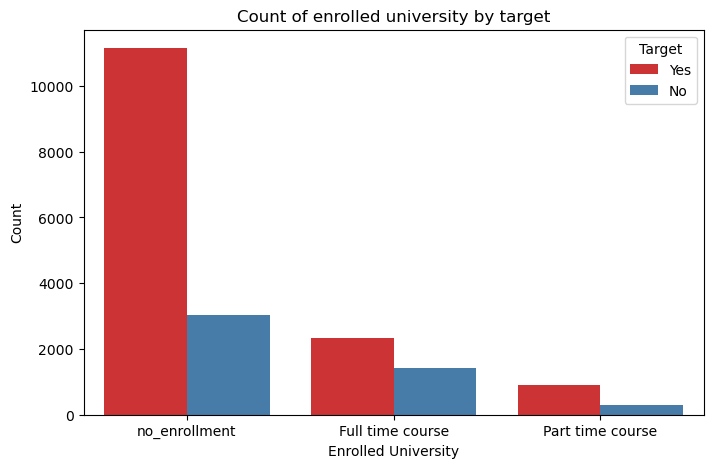

In [61]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='enrolled_university', hue='target', palette='Set1')
plt.title('Count of enrolled university by target')
plt.xlabel('Enrolled University')
plt.ylabel('Count')
plt.legend(title='Target', loc='upper right', labels=['Yes','No'])
plt.show()

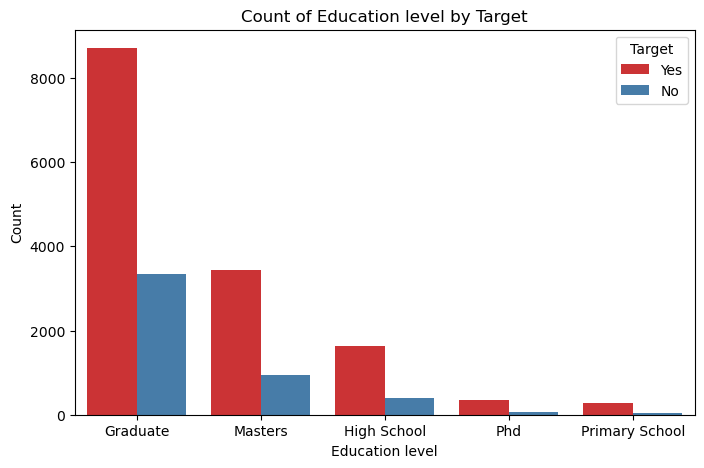

In [76]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='education_level', hue='target', palette='Set1')
plt.title('Count of Education level by Target')
plt.xlabel('Education level')
plt.ylabel('Count')
plt.legend(title='Target', loc='upper right', labels=['Yes','No'])
plt.show()

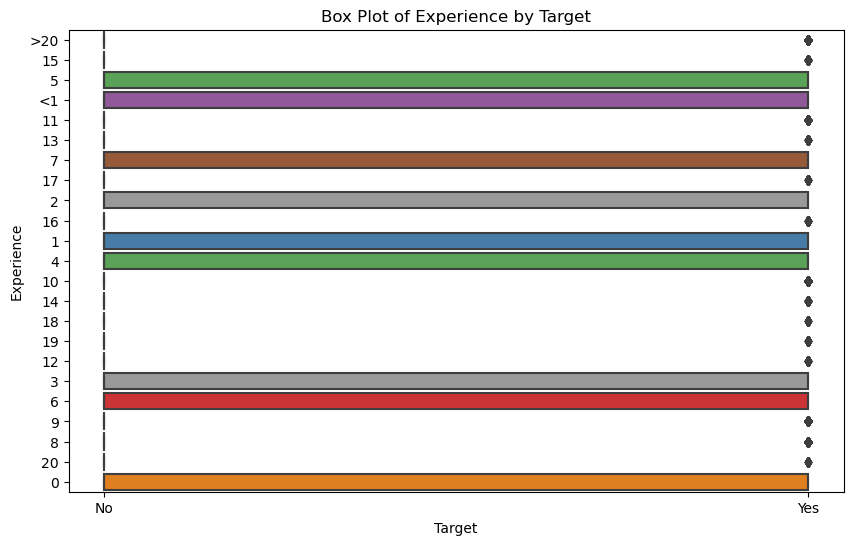

In [65]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='target', y='experience', palette='Set1')

# Adding title and labels
plt.title('Box Plot of Experience by Target')
plt.xlabel('Target')
plt.ylabel('Experience')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

## Insights:

#### 1. Gender vs. Target
Insight: Visualizations may reveal differences in hiring rates between genders.

#### 2. Experience vs. Target
Insight: A box plot could show the relationship between years of experience and hiring outcomes.
Result: You may find that candidates with a certain range of experience are more likely to be hired, suggesting that experience is a crucial factor in hiring decisions.

#### 3. Enrolled University vs. Target
Insight: By visualizing the hiring outcomes based on the university attended, you can identify if graduates from specific institutions are more likely to be hired.

#### 4. Correlation Analysis
Insight: Visualizations like heatmaps can illustrate correlations between numerical features (e.g., experience and hiring rates).
Result: Strong correlations may highlight important factors affecting hiring outcomes, guiding HR practices.

### Summary of Results:
- Visualizations enable you to communicate findings clearly, helping to identify trends, biases, and opportunities for improving hiring practices.
- They provide evidence to support data-driven decisions, making HR processes more effective and inclusive.